In [25]:
import numpy as np
import matplotlib as mpl
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
plt.rc("text", usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}")
plt.rc("font", family="serif", serif=["Computer Modern"])
plt.rc("axes", titlesize=20, labelsize=18)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

# 8.1.15

In [26]:
def diff(t, x, p):
    return ((p + x[0]) * (1 - (p + x[0]) - x[1]) - x[0] * x[1],
            x[1] * (1 - (p + x[0]) - x[1]) - (p + x[0]) * x[1])

In [27]:
ps = np.concatenate([np.linspace(0.12, 0.133, 100, endpoint=False),
                    np.linspace(0.133, 0.135, 100, endpoint=False),
                    np.linspace(0.135, 0.15, 100)])
t = np.linspace(0, 1000, 10000)
nA = np.empty((len(ps), 10000))
nB = np.empty_like(nA)
for (i, p) in enumerate(ps):
    sol = solve_ivp(diff, (0, 1000), (0, 1 - p), args=(p,),
                    method="BDF", dense_output=True)
    nA[i], nB[i] = sol.sol(t)

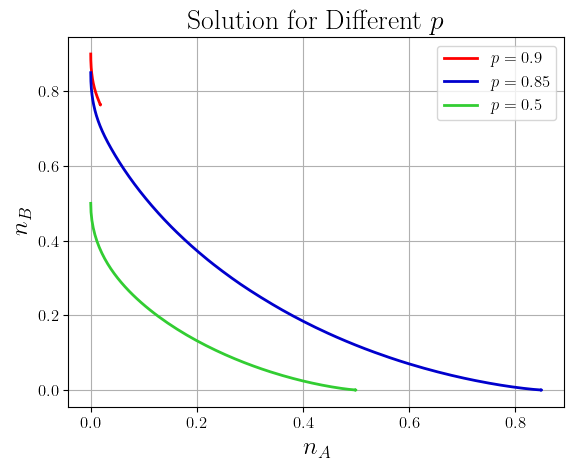

In [28]:
plt.title("Solution for Different $p$")
plt.xlabel(r"$n_A$")
plt.ylabel(r"$n_B$")

sol = solve_ivp(diff, (0, 1000), (0, 0.9), args=(0.1,),
                    method="BDF", dense_output=True)
x, y = sol.sol(t)
plt.plot(x, y, color="red", label=r"$p=0.9$", lw=2)

sol = solve_ivp(diff, (0, 1000), (0, 0.85), args=(0.15,),
                method="BDF", dense_output=True)
x, y = sol.sol(t)
plt.plot(x, y, color="mediumblue", label=r"$p=0.85$", lw=2)

sol = solve_ivp(diff, (0, 1000), (0, 0.5), args=(0.5,),
                    method="BDF", dense_output=True)
x, y = sol.sol(t)
plt.plot(x, y, color="limegreen", label=r"$p=0.5$", lw=2)

plt.grid()
plt.legend()
plt.savefig("8.1.15.solution.pdf", bbox_inches="tight")
plt.show()

In [29]:
pcritical = ps[np.argmax(nB[:, -1] < 0.1)]
print(pcritical)

0.134


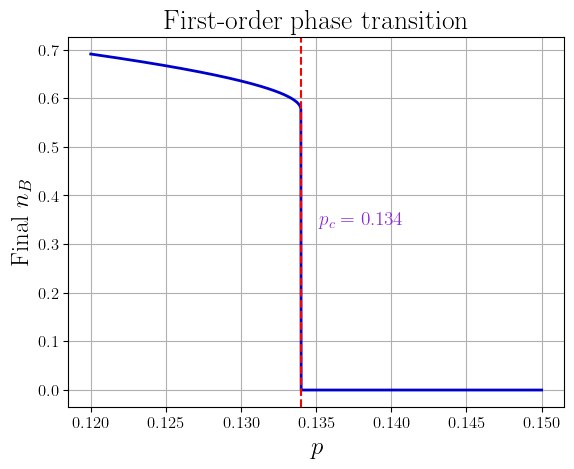

In [30]:
plt.title("First-order phase transition")
plt.xlabel(r"$p$")
plt.ylabel(r"Final $n_B$")
plt.plot(ps, nB[:, -1], c="mediumblue", lw=2)
plt.axvline(pcritical, color="red", ls="dashed")
plt.text(0.1351, 0.35, fr"$p_{{c}} = {pcritical}$",
         va="center", ha="left", fontsize=14, color="blueviolet")
plt.grid()
plt.savefig("8.1.15.bifurcation.pdf", bbox_inches="tight")
plt.show()


# 8.2.9

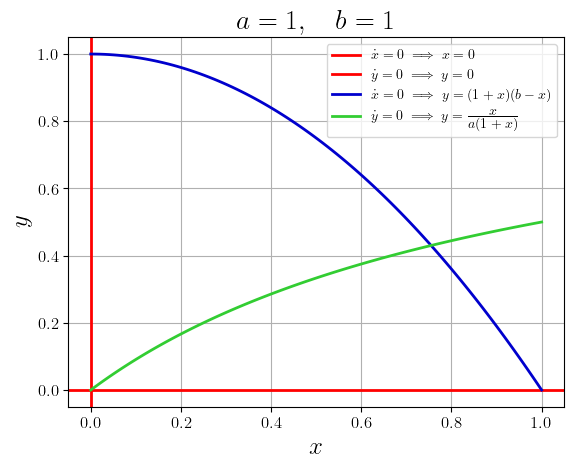

In [37]:
y, x = np.mgrid[0:1:100j, 0:1:100j]
a, b = 1, 1

plt.title(fr"$a={a},\quad b={b}$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.axhline(0, color="red", lw=2, label=r"$\dot{x}=0 \implies x=0$")
plt.axvline(0, color="red", lw=2, label=r"$\dot{y}=0 \implies y=0$")
plt.plot(x[0], (1 + x[0]) * (b - x[0]),
         color="mediumblue", lw=2,
         label=r"$\dot{x}=0 \implies y=(1+x)(b-x)$")
plt.plot(x[0], x[0] / (a * (1 + x[0])),
         color="limegreen", lw=2,
         label=r"$\dot{y}=0 \implies y=\frac{\displaystyle x}{\displaystyle a(1+x)}$")

plt.grid()
plt.legend(loc=1, fontsize=10)
plt.savefig("8.2.9.nullclines.pdf", bbox_inches="tight")
plt.show()

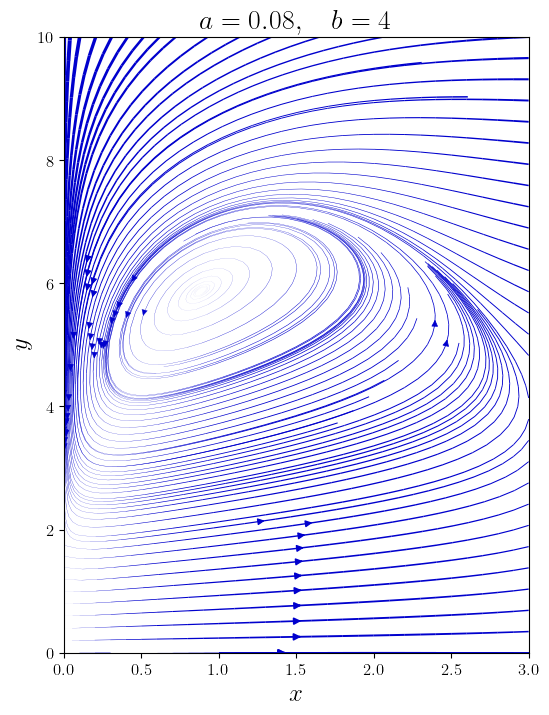

In [51]:
y, x = np.mgrid[0:10:1000j, 0:3:1000j]
a, b = 0.08, 4
xdot = x * (b - x - y / (1 + x))
ydot = y * (x / (1 + x) - a * y)

speed = np.sqrt(xdot**2 + ydot**2)
lw = 3 * speed / speed.max()

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title(fr"$a={a},\quad b={b}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.streamplot(x, y, xdot, ydot, color="mediumblue", linewidth=lw,
               broken_streamlines=False)
ax.set_xlim(0, 3)
ax.set_ylim(0, 10)
plt.savefig("8.2.9.overcrit.pdf", bbox_inches="tight")
plt.show()

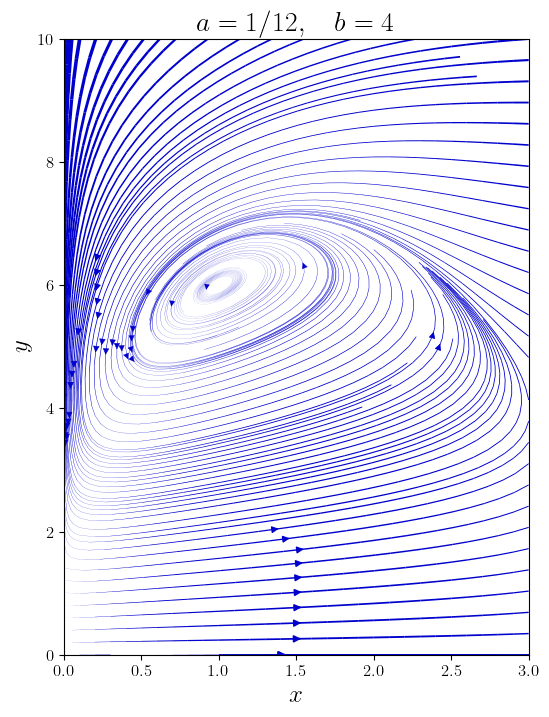

In [54]:
y, x = np.mgrid[0:10:1000j, 0:3:1000j]
a, b = 1/12, 4
xdot = x * (b - x - y / (1 + x))
ydot = y * (x / (1 + x) - a * y)

speed = np.sqrt(xdot**2 + ydot**2)
lw = 3 * speed / speed.max()

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title(fr"$a=1/12,\quad b={b}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.streamplot(x, y, xdot, ydot, color="mediumblue", linewidth=lw,
               broken_streamlines=False)
ax.set_xlim(0, 3)
ax.set_ylim(0, 10)
plt.savefig("8.2.9.critical.pdf", bbox_inches="tight")
plt.show()

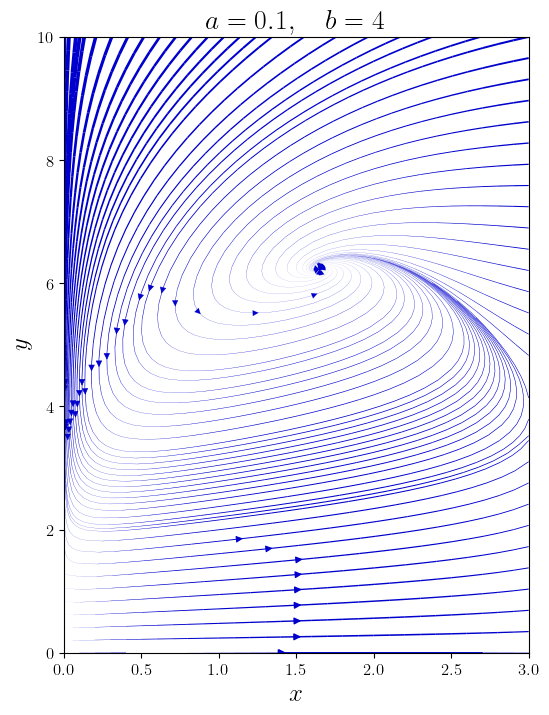

In [55]:
y, x = np.mgrid[0:10:1000j, 0:3:1000j]
a, b = 0.1, 4
xdot = x * (b - x - y / (1 + x))
ydot = y * (x / (1 + x) - a * y)

speed = np.sqrt(xdot**2 + ydot**2)
lw = 3 * speed / speed.max()

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title(fr"$a={a},\quad b={b}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.streamplot(x, y, xdot, ydot, color="mediumblue", linewidth=lw,
               broken_streamlines=False)
ax.set_xlim(0, 3)
ax.set_ylim(0, 10)
plt.savefig("8.2.9.undercrit.pdf", bbox_inches="tight")
plt.show()